# Exploratory Data Analysis - The history of Nobel Prize Winners

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

## Objective

Perform Exploratory Data Analysis to answer the following questions: 
- What is the most commonly awarded Gender and Country? 
- Which decade has the highest ratio of US-born Nobel Prize winners to total winners in all categories?
- Which decade and Nobel Prize category combination had the highest proportion of female laureates? 
- Who was the first woman to receive a Nobel Prize? 
- Which individuals or organizations that have won more than one Nobel Prize?


In [168]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/nobel.csv')
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [169]:
#-----------------------------------------------#
# Most commonly awarded gender and birth country
#-----------------------------------------------#

top_country = df['birth_country'].value_counts(sort=True).index[0]
top_gender = df['sex'].value_counts(sort=True).index[0]

print(f'The most commonly awarded gender is {top_gender} and the most commonly awarded country is {top_country}')

The most commonly awarded gender is Male and the most commonly awarded country is United States of America


The decade that had the highest ratio of US-born Nobel Prize winners to total winners in all categories was 2000 



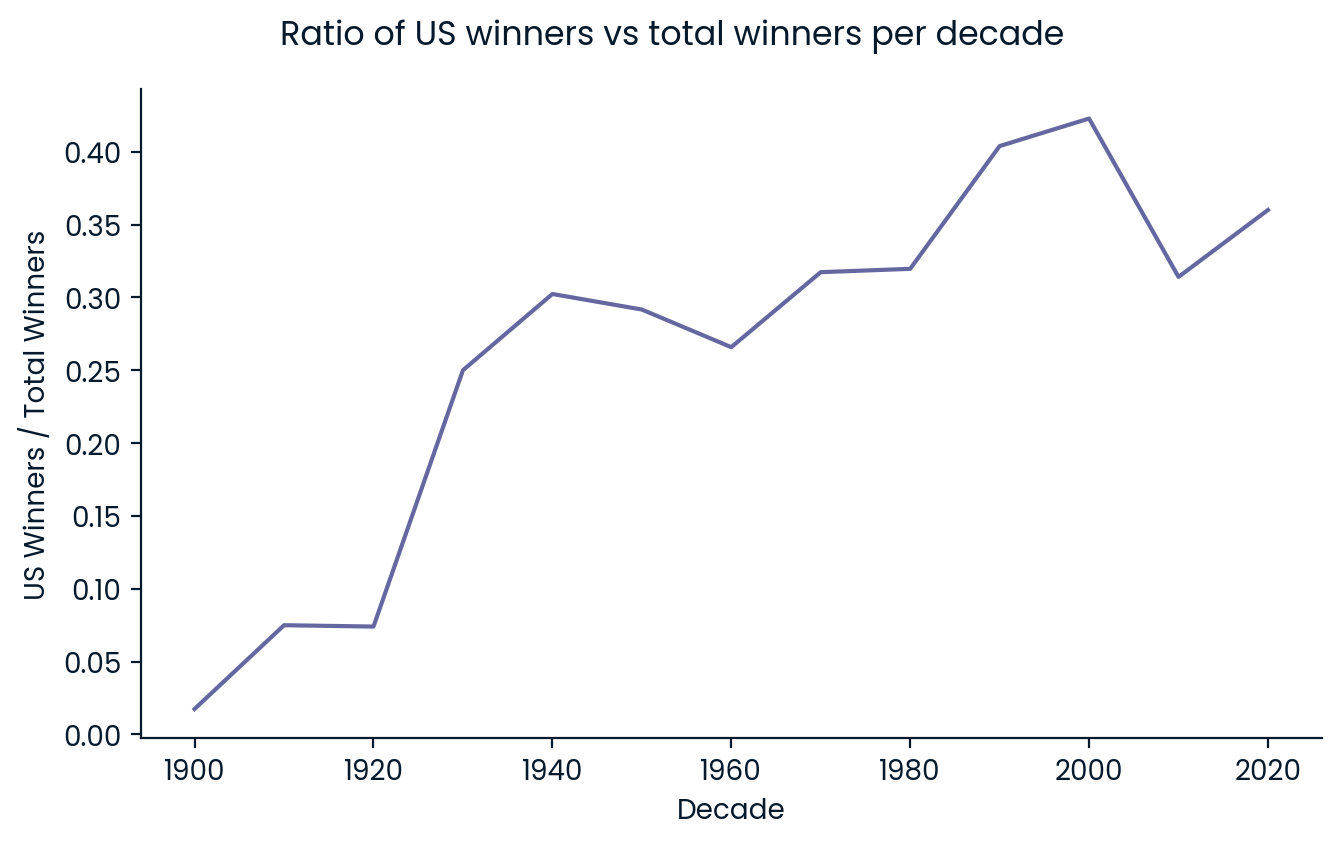

In [170]:
#--------------------------------------------------------------------------------------------------#
# Decade with the highest ratio of US-born Nobel Prize winners to total winners in all categories. 
#--------------------------------------------------------------------------------------------------#

# Extract Decades from year
df['decade'] = (df['year'] // 10) * 10

# Group by Decade and Calulate the ratio
total_winners_per_decade = df.groupby('decade')['prize'].count()
us_winners_per_decade = df.query("birth_country=='United States of America'").groupby('decade')['prize'].count()
ratio_of_us_vs_total = us_winners_per_decade/total_winners_per_decade
max_decade_usa = (us_winners_per_decade / total_winners_per_decade).sort_values(ascending=False).index[0]

# Print results and plot
print(f'The decade that had the highest ratio of US-born Nobel Prize winners to total winners in all categories was {max_decade_usa}','\n')

g = sns.relplot(kind='line',x=ratio_of_us_vs_total.index,y=ratio_of_us_vs_total,height=4,aspect=1.7)
g.fig.suptitle('Ratio of US winners vs total winners per decade',y=1.05)
g.set(xlabel='Decade',ylabel='US Winners / Total Winners')
plt.show()


The decade and Nobel Prize category combination that had the highest proportion of female laureates is {2020: 'Literature'} 



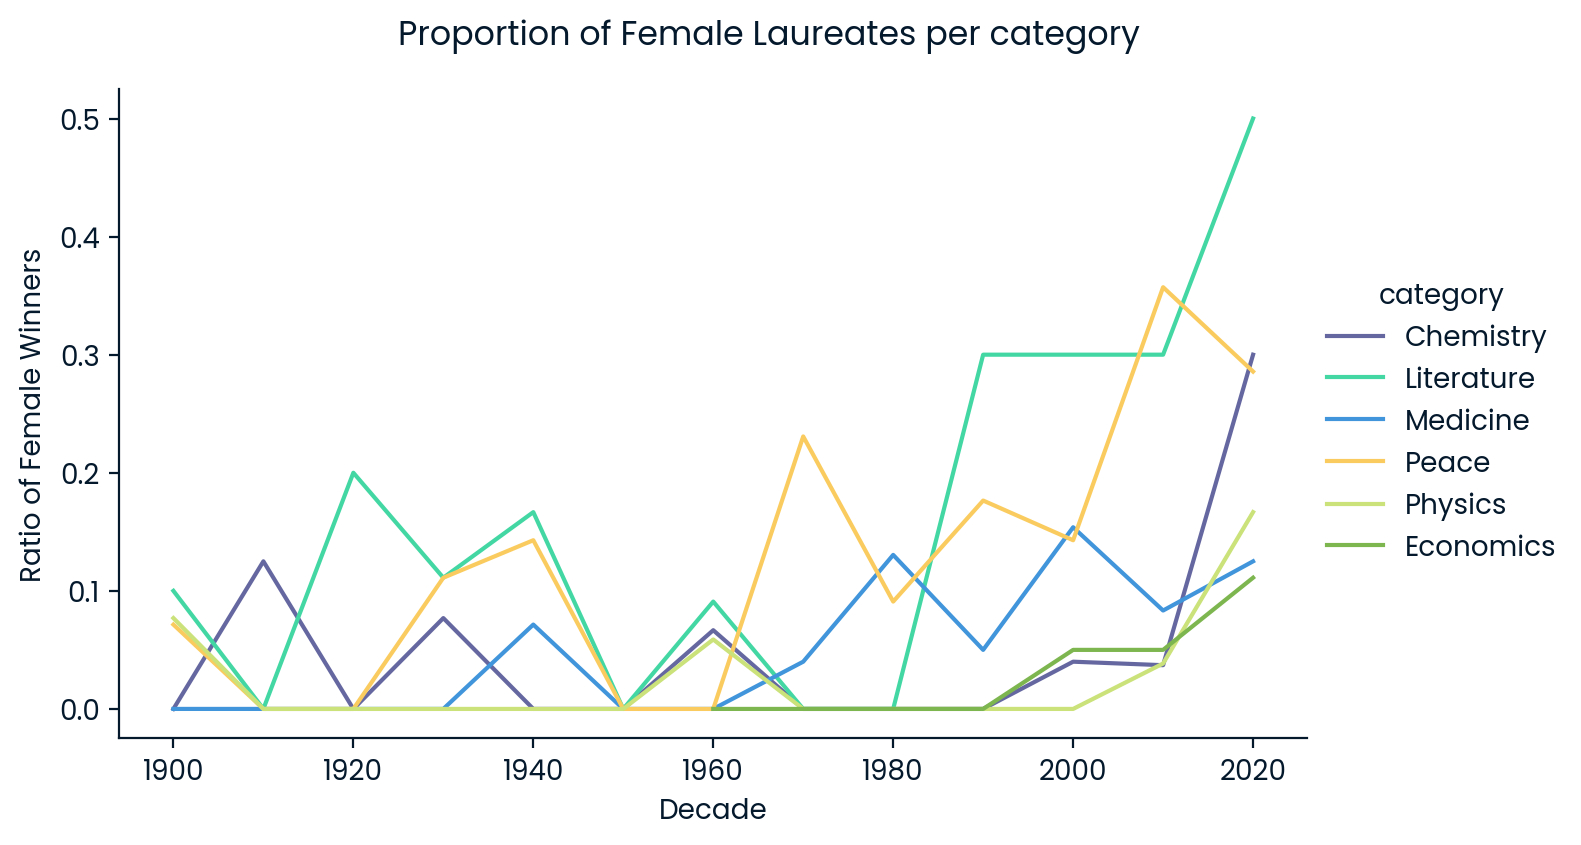

In [171]:
#--------------------------------------------------------------------------------------------------#
# Decade and Nobel Prize category combination that had the highest proportion of female laureates
#--------------------------------------------------------------------------------------------------#

# Filtering for Female Winners
df['female_winner'] = df['sex']=='Female'

# Group by decade, category and sort to find highest 
female_winners_df = df.groupby(['decade','category'],as_index=False).mean()[['decade','category','female_winner']]
f_winners_srt = female_winners_df.sort_values(by='female_winner',ascending=False)
max_female_dict = {f_winners_srt['decade'].values[0]:f_winners_srt['category'].values[0]}

# Print results and plot
print(f'The decade and Nobel Prize category combination that had the highest proportion of female laureates is {max_female_dict}','\n')

g = sns.relplot(kind='line',data =female_winners_df,x='decade',y='female_winner',hue='category',height=4,aspect=1.7)
g.fig.suptitle('Proportion of Female Laureates per category',y=1.05)
g.set(xlabel='Decade',ylabel='Ratio of Female Winners')
plt.show()

In [175]:
#-------------------------------------------------#
# First woman to receive a Nobel Prize
#-------------------------------------------------#

first_woman_name = df[df['female_winner']==True]['full_name'].iloc[0].split(',')[0]
first_woman_category = df[df['female_winner']==True]['category'].iloc[0]
first_woman_year = df[df['female_winner']==True]['year'].iloc[0]

# Print Results 
print(f'The first woman to receive a Nobel Prize was {first_woman_name}, for the category of {first_woman_category}, in {first_woman_year}.')

The first woman to receive a Nobel Prize was Marie Curie, for the category of Physics, in 1903.


In [173]:
#---------------------------------------------------------------------#
# Individuals or organizations that have won more than one Nobel Prize
#---------------------------------------------------------------------#

# Count number of awards per individual / organization 
repeat_winners = df['full_name'].value_counts().reset_index()
repeat_winners.columns = ['name','award_count']

# Select names of individuals and store them as a list. 
repeat_list = repeat_winners[repeat_winners['award_count']>1]['name'].to_list()

# Print Results
print(f'The individuals / organizations that have won more than one Nobel prize are:\n {repeat_list}')

The individuals / organizations that have won more than one Nobel prize are:
 ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
